In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
logits = ((torch.rand(size=(64,10)) - 0.5) * 10)
softmaxes = torch.nn.Softmax(dim=1)(logits)

uncertainties = entr(softmaxes)

<BarContainer object of 5 artists>

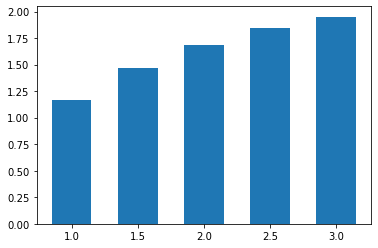

In [45]:
batch_size = 64
n_classes = 10

# random logits between -5 and 5
logits = ((torch.rand(size=(batch_size,n_classes)) - 0.5) * 10)

# apply different temperature scalings then check average entropy of the 64 softmax vectors
avg_uncertainties = list()
T_list = [1,1.5,2,2.5,3]
for T in T_list:
    logits_scaled = logits / T
    softmaxes = torch.nn.Softmax(dim=1)(logits_scaled)
    uncertainties = nentr(softmaxes)
    avg_uncertainties.append(uncertainties.mean())
    
plt.bar(T_list,avg_uncertainties,width=0.3)

As the temperature increasers, so does the entropy of the softmax vectors!